In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_classes import *

In [2]:
batch_size = 4

num_ctx_frames = 1
num_tgt_frames = 9
action_types = "flipped_jumpingjack"

weizmann = WeizmannDataModule(batch_size, num_ctx_frames, num_tgt_frames,
                                  action_types=action_types)

weizmann.setup()
tl = weizmann.train_dataloader()
train_ctx_batch, train_tgt_batch = next(iter(tl))
print(train_ctx_batch.shape)
print(train_tgt_batch.shape)

vl = weizmann.val_dataloader()
val_ctx_batch, val_tgt_batch = next(iter(tl))

torch.Size([4, 3, 1, 144, 180])
torch.Size([4, 3, 9, 144, 180])


In [3]:
val_ctx_batch.shape[0]

4

In [4]:
val_ctx_batch[0].permute(1, 2, 3, 0).shape

torch.Size([5, 144, 180, 3])

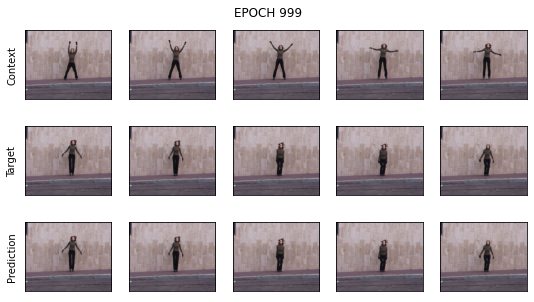

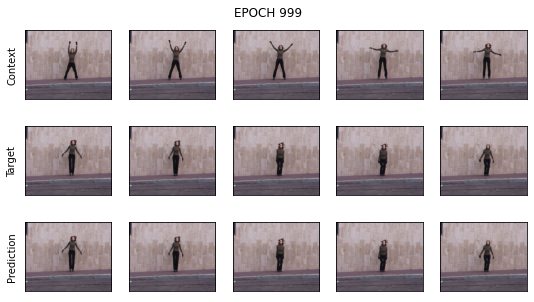

In [6]:
def make_plot(ctx, tgt, pred, epoch=999, cmap='gray'):
    num_ctx_frames= ctx.shape[0]
    num_tgt_frames = tgt.shape[0]

    def show_frames(frames, ax, row_label=None):
        for i, frame in enumerate(frames):
            if cmap is not None:
                ax[i].imshow(frame, cmap)
            else:
                ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])

        if row_label is not None:
            ax[0].set_ylabel(row_label)

    ctx_frames = ctx.squeeze().cpu().numpy()
    tgt_frames = tgt.squeeze().cpu().numpy()
    pred_frames = pred.squeeze().cpu().numpy()

    fig, ax = plt.subplots(3, max(num_ctx_frames, num_tgt_frames),
                       figsize = (9, 5))
    fig.suptitle(f"EPOCH {epoch}", y=0.93)
    show_frames(ctx_frames, ax[0], "Context")
    show_frames(tgt_frames, ax[1], "Target")
    show_frames(pred_frames, ax[2], "Prediction")

    return fig

make_plot(val_ctx_batch[0].permute(1, 2, 3, 0), 
          val_tgt_batch[0].permute(1, 2, 3, 0), 
          val_tgt_batch[0].permute(1, 2, 3, 0), epoch=999, cmap='gray')

In [ ]:
print(len(weizmann.train))
print(len(weizmann.val))
print(len(weizmann.test))

### Make a sample plot for the thesis

In [ ]:
jumpingjacks = np.load("flipped_jumpingjack.npy")         
jumpingjacks.shape

In [ ]:
def make_weizmann_plot(arr, id1, id2):
    def show_frames(frames, ax, start_id, row_label=None):
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.2)

        if row_label is not None:
            ax[0].set_ylabel(row_label)
            ax[0].yaxis.set_label_coords(-0.01, 0.5)
    
    fig, ax = plt.subplots(4, 5,
                        figsize = (7, 5))
    
    show_frames(arr[id1, :5], ax[0], 1, "original")
    show_frames(arr[id1, 5:], ax[1], 6, "original")
    show_frames(arr[id2, :5], ax[2], 1, "flipped")
    show_frames(arr[id2, 5:], ax[3], 6, "flipped")

    fig.set_facecolor("white")
    plt.savefig("sample_plot.pdf")
    return fig

In [ ]:
id1 = 2
id2 = jumpingjacks.shape[0] // 2 + id1
fig = make_weizmann_plot(jumpingjacks, id1, id2)

In [ ]:
plt.savefig("sample_plot.pdf")